In [3]:
import pandas as pd 
import sklearn as sk
import matplotlib as mt


In [4]:
df = pd.read_csv("AmesHousing.csv")

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   str    
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   str    
 7   Alley            198 non-null    str    
 8   Lot Shape        2930 non-null   str    
 9   Land Contour     2930 non-null   str    
 10  Utilities        2930 non-null   str    
 11  Lot Config       2930 non-null   str    
 12  Land Slope       2930 non-null   str    
 13  Neighborhood     2930 non-null   str    
 14  Condition 1      2930 non-null   str    
 15  Condition 2      2930 non-null   str    
 16  Bldg Type        2930 non-null   str    
 17  House Style      2930 non

In [5]:
df = df[[
    "Overall Qual",
    "SalePrice",
    "Overall Cond",
    "Year Built",
    "Gr Liv Area",
    "Total Bsmt SF",
    "Garage Area",
    "TotRms AbvGrd",
    "Lot Area",
    "Neighborhood",
    "House Style",
    "Exter Qual",
    "Foundation",
    "Fireplaces",
    "Pool Area"
]]

In [6]:
df

,Overall Qual,SalePrice,Overall Cond,Year Built,Gr Liv Area,Total Bsmt SF,Garage Area,TotRms AbvGrd,Lot Area,Neighborhood,House Style,Exter Qual,Foundation,Fireplaces,Pool Area
0,6,215000,5,1960,1656,1080.0,528.0,7,31770,NAmes,1Story,TA,CBlock,2,0
1,5,105000,6,1961,896,882.0,730.0,5,11622,NAmes,1Story,TA,CBlock,0,0
2,6,172000,6,1958,1329,1329.0,312.0,6,14267,NAmes,1Story,TA,CBlock,0,0
3,7,244000,5,1968,2110,2110.0,522.0,8,11160,NAmes,1Story,Gd,CBlock,2,0
4,5,189900,5,1997,1629,928.0,482.0,6,13830,Gilbert,2Story,TA,PConc,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,6,142500,6,1984,1003,1003.0,588.0,6,7937,Mitchel,SLvl,TA,CBlock,0,0
2926,5,131000,5,1983,902,864.0,484.0,5,8885,Mitchel,1Story,TA,CBlock,0,0
2927,5,132000,5,1992,970,912.0,0.0,6,10441,Mitchel,SFoyer,TA,PConc,0,0
2928,5,170000,5,1974,1389,1389.0,418.0,6,10010,Mitchel,1Story,TA,CBlock,1,0


In [7]:
df.shape

(2930, 15)

In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2930 non-null   int64  
 1   SalePrice      2930 non-null   int64  
 2   Overall Cond   2930 non-null   int64  
 3   Year Built     2930 non-null   int64  
 4   Gr Liv Area    2930 non-null   int64  
 5   Total Bsmt SF  2929 non-null   float64
 6   Garage Area    2929 non-null   float64
 7   TotRms AbvGrd  2930 non-null   int64  
 8   Lot Area       2930 non-null   int64  
 9   Neighborhood   2930 non-null   str    
 10  House Style    2930 non-null   str    
 11  Exter Qual     2930 non-null   str    
 12  Foundation     2930 non-null   str    
 13  Fireplaces     2930 non-null   int64  
 14  Pool Area      2930 non-null   int64  
dtypes: float64(2), int64(9), str(4)
memory usage: 343.5 KB


In [9]:
df.describe()

,Overall Qual,SalePrice,Overall Cond,Year Built,Gr Liv Area,Total Bsmt SF,Garage Area,TotRms AbvGrd,Lot Area,Fireplaces,Pool Area
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,6.094881,180796.060068,5.563140,1971.356314,1499.690444,1051.614544,472.819734,6.443003,10147.921843,0.599317,2.243345
std,1.411026,79886.692357,1.111537,30.245361,505.508887,440.615067,215.046549,1.572964,7880.017759,0.647921,35.597181
min,1.000000,12789.000000,1.000000,1872.000000,334.000000,0.000000,0.000000,2.000000,1300.000000,0.000000,0.000000
25%,5.000000,129500.000000,5.000000,1954.000000,1126.000000,793.000000,320.000000,5.000000,7440.250000,0.000000,0.000000
50%,6.000000,160000.000000,5.000000,1973.000000,1442.000000,990.000000,480.000000,6.000000,9436.500000,1.000000,0.000000
75%,7.000000,213500.000000,6.000000,2001.000000,1742.750000,1302.000000,576.000000,7.000000,11555.250000,1.000000,0.000000
max,10.000000,755000.000000,9.000000,2010.000000,5642.000000,6110.000000,1488.000000,15.000000,215245.000000,4.000000,800.000000


In [10]:
df.head()

,Overall Qual,SalePrice,Overall Cond,Year Built,Gr Liv Area,Total Bsmt SF,Garage Area,TotRms AbvGrd,Lot Area,Neighborhood,House Style,Exter Qual,Foundation,Fireplaces,Pool Area
0,6,215000,5,1960,1656,1080.0,528.0,7,31770,NAmes,1Story,TA,CBlock,2,0
1,5,105000,6,1961,896,882.0,730.0,5,11622,NAmes,1Story,TA,CBlock,0,0
2,6,172000,6,1958,1329,1329.0,312.0,6,14267,NAmes,1Story,TA,CBlock,0,0
3,7,244000,5,1968,2110,2110.0,522.0,8,11160,NAmes,1Story,Gd,CBlock,2,0
4,5,189900,5,1997,1629,928.0,482.0,6,13830,Gilbert,2Story,TA,PConc,1,0


In [11]:
df.tail()

,Overall Qual,SalePrice,Overall Cond,Year Built,Gr Liv Area,Total Bsmt SF,Garage Area,TotRms AbvGrd,Lot Area,Neighborhood,House Style,Exter Qual,Foundation,Fireplaces,Pool Area
2925,6,142500,6,1984,1003,1003.0,588.0,6,7937,Mitchel,SLvl,TA,CBlock,0,0
2926,5,131000,5,1983,902,864.0,484.0,5,8885,Mitchel,1Story,TA,CBlock,0,0
2927,5,132000,5,1992,970,912.0,0.0,6,10441,Mitchel,SFoyer,TA,PConc,0,0
2928,5,170000,5,1974,1389,1389.0,418.0,6,10010,Mitchel,1Story,TA,CBlock,1,0
2929,7,188000,5,1993,2000,996.0,650.0,9,9627,Mitchel,2Story,TA,PConc,1,0


In [12]:
df = df.dropna(subset=[
    "SalePrice",
    "Overall Qual",
    "Overall Cond",
    "Year Built",
    "Gr Liv Area",
    "Total Bsmt SF",
    "Garage Area",
    "TotRms AbvGrd",
    "Lot Area",
    "Neighborhood",
    "House Style",
    "Exter Qual",
    "Foundation",
    "Fireplaces",
    "Pool Area"
])

In [13]:
df.info()

<class 'pandas.DataFrame'>
Index: 2928 entries, 0 to 2929
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2928 non-null   int64  
 1   SalePrice      2928 non-null   int64  
 2   Overall Cond   2928 non-null   int64  
 3   Year Built     2928 non-null   int64  
 4   Gr Liv Area    2928 non-null   int64  
 5   Total Bsmt SF  2928 non-null   float64
 6   Garage Area    2928 non-null   float64
 7   TotRms AbvGrd  2928 non-null   int64  
 8   Lot Area       2928 non-null   int64  
 9   Neighborhood   2928 non-null   str    
 10  House Style    2928 non-null   str    
 11  Exter Qual     2928 non-null   str    
 12  Foundation     2928 non-null   str    
 13  Fireplaces     2928 non-null   int64  
 14  Pool Area      2928 non-null   int64  
dtypes: float64(2), int64(9), str(4)
memory usage: 366.0 KB


In [14]:
X = df.drop("SalePrice", axis=1) # to X i assign everything unless price which is our label 
X

,Overall Qual,Overall Cond,Year Built,Gr Liv Area,Total Bsmt SF,Garage Area,TotRms AbvGrd,Lot Area,Neighborhood,House Style,Exter Qual,Foundation,Fireplaces,Pool Area
0,6,5,1960,1656,1080.0,528.0,7,31770,NAmes,1Story,TA,CBlock,2,0
1,5,6,1961,896,882.0,730.0,5,11622,NAmes,1Story,TA,CBlock,0,0
2,6,6,1958,1329,1329.0,312.0,6,14267,NAmes,1Story,TA,CBlock,0,0
3,7,5,1968,2110,2110.0,522.0,8,11160,NAmes,1Story,Gd,CBlock,2,0
4,5,5,1997,1629,928.0,482.0,6,13830,Gilbert,2Story,TA,PConc,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,6,6,1984,1003,1003.0,588.0,6,7937,Mitchel,SLvl,TA,CBlock,0,0
2926,5,5,1983,902,864.0,484.0,5,8885,Mitchel,1Story,TA,CBlock,0,0
2927,5,5,1992,970,912.0,0.0,6,10441,Mitchel,SFoyer,TA,PConc,0,0
2928,5,5,1974,1389,1389.0,418.0,6,10010,Mitchel,1Story,TA,CBlock,1,0


In [15]:
y = df["SalePrice"]
y

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: SalePrice, Length: 2928, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200) 

In [17]:
for a in (X_train, X_test, y_train, y_test):
    print (a.shape)

(2342, 14)
(586, 14)
(2342,)
(586,)


In [18]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

non_numerical_cols = ['Neighborhood','House Style','Exter Qual', 'Foundation'] # we identify the non numerical colums 

transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), non_numerical_cols)], # after identfy the non numerical function we use te columntrasnformer fuction 
                               remainder='passthrough') # This specifies that all other columns should be kept

X_encoded = transformer.fit_transform(X) #fit is something that cannot be run rum by run, but it 

In [19]:
X_encoded.shape # from 7 to 31 columns (or features) , now as 31 columsn not 7 as before, columns where added just to arrange make and body style, 
#if it is enconded we cannot printed , we cannot do x.encoded.tail or x.encoded.head, as it is encoded. 


(2928, 56)

In [20]:
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=200)

In [21]:
X_train_encoded.shape

(2342, 56)

In [22]:
%%time
from sklearn.linear_model import LinearRegression

model = LinearRegression() # the model is like a funxrion which can be use to predict 

model.fit(X_train_encoded, y_train)

CPU times: user 6.76 ms, sys: 1.48 ms, total: 8.24 ms
Wall time: 7.52 ms


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [23]:
y_train_hat = model.predict(X_train_encoded)[:5]
y_train_hat # it is hat

array([191510.98080494, 283973.5571483 , 124809.2760416 , 155950.72552251,
       206211.08855505])

In [24]:
y_test_hat = model.predict(X_test_encoded) 
y_test_hat[:5] # now we do as before but we are in the test not train anymore. 

array([170035.12966132, 137402.58313161, 291003.40989539, 131468.76664579,
       385707.73282717])

In [25]:
y_test[:5]

1316    163000
1151    135000
2503    262000
764     159900
426     253293
Name: SalePrice, dtype: int64

In [26]:
# Training set - just for curiosity

y_train_hat = model.predict(X_train_encoded)

from sklearn.metrics import mean_absolute_error, r2_score

# calculate MEA score
mae = mean_absolute_error(y_train, y_train_hat)

# calculate R2 score
r2 = r2_score(y_train, y_train_hat)

print(f"mean absolute error  = {mae}")
print(f"r-squared score  = {r2}")

mean absolute error  = 18882.33741485213
r-squared score  = 0.8504007806951542


In [27]:
from sklearn.metrics import mean_absolute_error, r2_score

# calculate MEA score
mae = mean_absolute_error(y_test, y_test_hat)

# calculate R2 score
r2 = r2_score(y_test, y_test_hat)

print(f"mean absolute error  = {mae}")
print(f"r-squared score  = {r2}")

mean absolute error  = 20503.91507331079
r-squared score  = 0.8501324262648455


Threshold (percentage error): 0.9
Numero veri outliers: 9


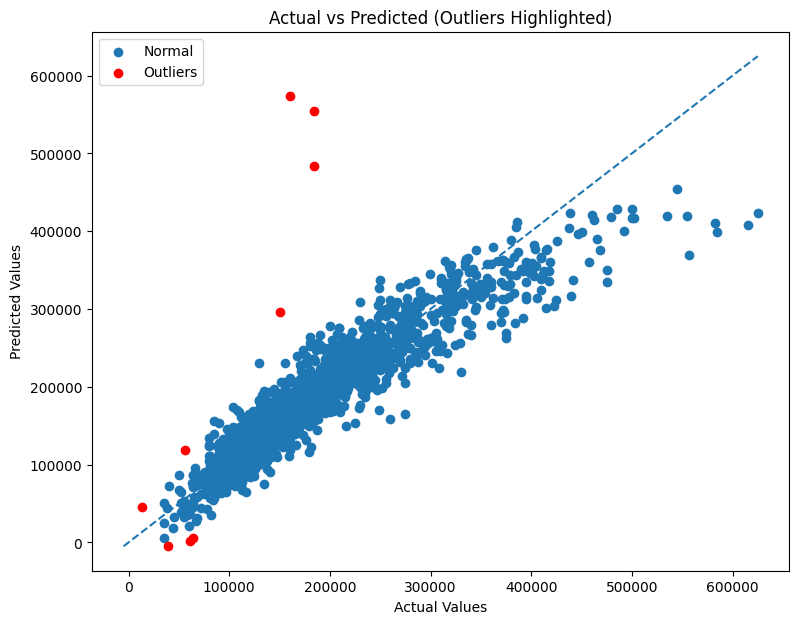


Top 10 percentage errors:
1498    2.589761
1553    2.461234
2180    2.013901
2181    1.620681
306     1.124317
1901    1.123742
1182    0.973709
765     0.961385
780     0.914524
2843    0.854486
Name: SalePrice, dtype: float64


In [50]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Residui + errore percentuale
residuals = y_train - y_train_hat
percentage_error = np.abs(residuals) / y_train

# 2) Soglia (90% è altissima: potresti avere 0 outliers)
threshold = 0.90
outliers_mask = percentage_error > threshold

print("Threshold (percentage error):", threshold)
print("Numero veri outliers:", int(np.sum(outliers_mask)))

# 3) Plot: normali + outliers evidenziati
plt.figure(figsize=(9, 7))

# Punti normali
plt.scatter(
    y_train[~outliers_mask],
    y_train_hat[~outliers_mask],
    label="Normal"
)

# Outliers in rosso (se esistono)
plt.scatter(
    y_train[outliers_mask],
    y_train_hat[outliers_mask],
    color="red",
    label="Outliers"
)

# Linea perfetta y=x
min_val = min(y_train.min(), np.min(y_train_hat))
max_val = max(y_train.max(), np.max(y_train_hat))
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Outliers Highlighted)")
plt.legend()
plt.show()

# 4) Se non vedi outliers, stampa i 10 errori % più grandi
top10 = percentage_error.sort_values(ascending=False).head(10)
print("\nTop 10 percentage errors:")
print(top10)

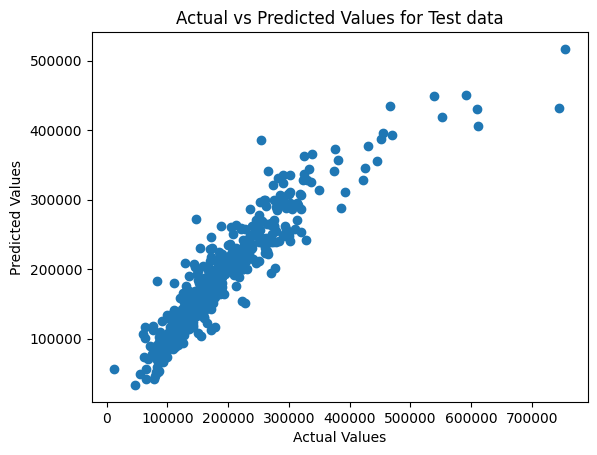

In [29]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_hat)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values for Test data")

plt.show()

# in this case the test data are much worst then the train data. 
# we can see that the points are more scattered in the test data, while in the train data they are more close to the line.

In [51]:
# =========================
# IDENTIFY ONLY "TRUE" OUTLIERS (not small errors like ~18k)
# Method: Percentage Error + Plot
# =========================

import numpy as np
import matplotlib.pyplot as plt

# --- 1) Make sure y_train_hat exists ---
# If you don't have predictions yet, uncomment ONE of these depending on your model:
# y_train_hat = model.predict(X_train_scaled)   # if you used scaled arrays
# y_train_hat = model.predict(X_train)          # if you used a model that accepts DataFrame directly

# --- 2) Compute residuals and percentage error ---
residuals = y_train - y_train_hat
percentage_error = np.abs(residuals) / y_train   # e.g. 0.25 = 25% error

# --- 3) Choose a "true outlier" threshold (adjust if you want) ---
# 0.30 means: outlier only if model error > 30% of the real price
threshold = 0.90

outliers_mask = percentage_error > threshold

print("Threshold (percentage error):", threshold)
print("Numero veri outliers:", int(np.sum(outliers_mask)))

# --- 4) Get original DataFrame indices of outliers ---
true_outlier_indices = y_train.index[outliers_mask]
print("Indici veri outliers (dataset originale):")
print(true_outlier_indices.tolist())


Threshold (percentage error): 0.9
Numero veri outliers: 9
Indici veri outliers (dataset originale):
[765, 780, 2181, 306, 2180, 1498, 1901, 1553, 1182]
